# C0TB1060 蒲原紳乃輔

# pythonでお絵描き

*  `plt.scatter` を使って，何か絵を描いてみよう．  点の色や形を変えながら平面上に点を描画することで，原理的には何でもかけますね．顔文字っぽい簡単なものから，がんばればジョルジュ・スーラも驚くようなすごい点描も!?

* ヒント：`plt.xlim` や `plt.ylim` で表示範囲を指定することもできる．

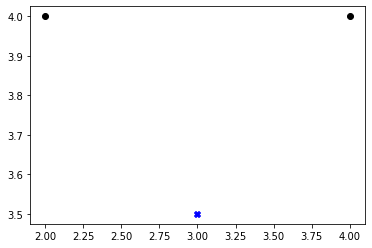

In [ ]:
## しょぼい作例： ミッフィーの拡大写真 ??
plt.scatter([2, 4], [4, 4], c="black", marker="o")
plt.scatter([3], [3.5], c="blue", marker="X") 
# plt.xlim(1.5, 4.5)       # plt.xlim の使用例．
plt.show()

## plt.scatter()を用いる
matplotlibのscatter関数を用いて絵をかいてみる
(作品) Mentalist というアメリカのドラマで出てくる殺人犯が残していく笑顔マーク \

(実物の画像) \
<img src="https://i.pinimg.com/originals/04/be/70/04be70eedf0559f7b61d692c71d8fb9e.jpg" width=200>

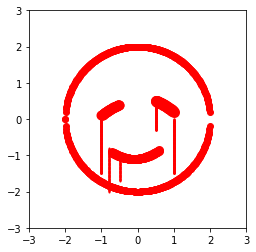

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")

#顔
x1 = np.arange(-2,2,0.01)
y1 = np.sqrt(4 - x1**2)
y2 = -np.sqrt(4 - x1**2)
ax.scatter(x1,y1,c="red")
ax.scatter(x1,y2,c="red")

#目、口
x3 = np.arange(-1,-0.5,0.01)
x4 = np.arange(0.5,1,0.01)
y3 = -0.4*(x3)**2 + 0.5
y4 = -0.4*(x4)**2 + 0.6
x5 = np.arange(-0.7,0.6,0.01)
y5 = 0.5*(x5+0.1)**2 - 1.1
ax.scatter(x3,y3,c="red",linewidth=4)
ax.scatter(x4,y4,c="red",linewidths=5)
ax.scatter(x5,y5,c="red",linewidth=3)

#その他工夫
y6 = np.arange(-1.5,-0,0.01)
x6 = -np.ones(y6.shape[0])
y7 = np.arange(-1.5,-0,0.01)
x7 = np.ones(y7.shape[0])
y8 = np.arange(-0.3,0.4,0.01)
x8 = 0.5*np.ones(y8.shape[0])
y9 = np.arange(-2,-0.8,0.01)
x9 = -0.8*np.ones(y9.shape[0])
y10 = np.arange(-1.7,-1,0.01)
x10 = -0.5*np.ones(y10.shape[0])
ax.scatter(x6,y6,c="red",s=2)
ax.scatter(x7,y7,c="red",s=2)
ax.scatter(x8,y8,c="red",s=2)
ax.scatter(x9,y9,c="red",s=1)
ax.scatter(x10,y10,c="red",s=1)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

## plt.imshow()を用いる 
多次元正規分布関数を用いてblack holeを書いてみる \

**本物** \

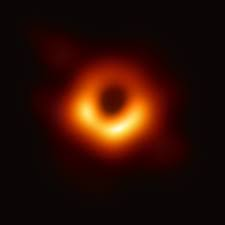 

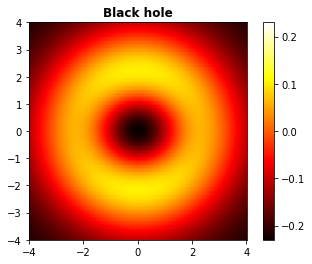

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
      
dx, dy = 0.015, 0.05
y1, x1 = np.mgrid[slice(-4, 4 + dy, dy),
                slice(-4, 4 + dx, dx)]

z1 = -(np.exp(-((0.75*x1) ** 2 + (0.8*y1) ** 2) / 2) +0.23 - np.exp(-((0.50*x1) ** 2 + (0.50*y1) ** 2) / 2))

z1 = z1[:-1, :-1]

z1_min, z1_max = -np.abs(z1).max(), np.abs(z1).max()
  
c = plt.imshow(z1, cmap ='hot', vmin = z1_min, vmax = z1_max,
                 extent =[x1.min(), x1.max(), y1.min(), y1.max()],
                    interpolation ='nearest', origin ='lower')
plt.colorbar(c)
  
plt.title('Black hole', fontweight ="bold")
plt.show()

似てますかね？？

# 2クラスデータの分類

## 練習課題

1.   上で試した閾値 5.3 を変えてみて，正解率がどう変化するのかを
試してみよう．このデータに対するもっともよい閾値は何だろうか？

2.  (やや上級者向け）閾値をx座標とし，正解率をy座標とするグラフを描け．こんな感じのグラフが描けるといいですね．

<img src="https://drive.google.com/uc?export=view&id=1EBKUUdkbjkBGs43CQvyNdAAGfHqn2Hh_" width = 60%>


**練習問題　解答**

In [ ]:
from sklearn.datasets import load_iris
import numpy as np 
iris = load_iris()

X = iris.data[iris.target!=2,0]
y = iris.target[iris.target!=2]

In [ ]:
np.printoptions(3)

In [ ]:
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [ ]:
def predict(x,y,k):
  label1 = np.unique(y)[0]
  label2 = np.unique(y)[1]
  #labelは正解ラベルの値(0,1の時もあれば1,2の時もあるので、一般化する)
  if x >= k:
      return label2
  else:
      return label1

def acc_cal(x,y,k):
  ok = 0    # 正解の個数を数えるカウンタ
  ng = 0    # 不正解の個数を数えるカウンタ
  for i in range(len(x)):
      if predict(x[i],y,k) == y[i]:
          ok += 1
      else:
          ng += 1
  assert ok + ng == len(x)    # 正解と不正解の個数の和が全体の個数になっているはず
  accuracy = (ok * 100)/ (ok + ng)

  return accuracy

In [ ]:
#闘値を変えて実験してみる
import numpy as np 
params = np.arange(4.0,7.0,0.1)

acc = []
#ループを回す
for param in params:
  accuracy = acc_cal(X,y,param)
  acc.append(accuracy)

#スコアの最大値を得る
idx = np.argmax(acc)
threshhold = params[idx]
print("When threshfold = {:.2g}, Max Score is {}%".format(threshhold,acc[idx]))

When threshfold = 5.5, Max Score is 89.0%


最後に正解率と闘値の関係性を示すプロットを示す

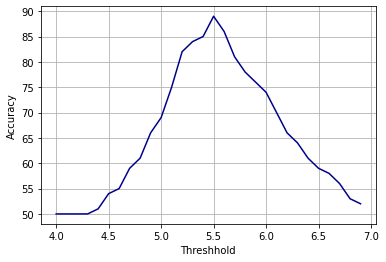

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(params,acc,color="darkblue",label="accuracy")
plt.xlabel("Threshhold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## 発展的な練習課題

1.  ここまでは，class 0 (setosa) とclass 1 (versicolor) を分類するために，0番目の特徴量 (sepal length) だけを使って分類を行ってきた．すなわち，
```
X = iris.data[iris.target!=2, 0]
y = iris.target[iris.target!=2]
```
に対する処理を行ってきた．同様の処理を，1番目の特徴量(sepal width) を使って行ってみよう．そのためには，このノートブックを【ファイル】→【ドライブに保存】して別名にしておいてから，
```
X = iris.data[iris.target!=2, 1]
y = iris.target[iris.target!=2]
```
に対する処理を確認していくとよいだろう．同様に，2番目の特徴量(pedal length) や 3番目の特徴量(pedal width) を使って行ってみよう．<br>
ただし，単純に [shift]+[enter] していくだけではうまく解析できないかもしれないので，作業内容をよく確認しながら進もう．（ヒント： `predict` の判定文の不等号の向きを変える必要があるかも?）<br>
この実験から，特徴量の選び方によって，分類のしやすさが異なることに気づくであろう．
どの特徴量を用いるのが最も効果的であっただろうか？
分類に効果的な少数の特徴量に注目することは，**特徴量の選択**として重要な課題である．

2. 【上級者向け】ここまでは，class 0 (setosa) とclass 1 (versicolor) の分類を行ってきた．同様の分類を，class 0 と class 2 に対して，また class 1 と class 2 に対して行ってみよう．
それぞれの場合に特化したプログラムを書くのもよいが，もっと一般的なプログラムとして仕上げることも考えてみよう．


[発展問題] \
上で行ってきた手法はclass0 vs class1の分類だが、以下同様にclass0 vs class2, class1 vs class2 で同様の操作をする。毎回同様の処理をコードを書くのは面倒なので、関数化してデータもloopを回しやすくするために処理を加える。

In [ ]:
#データを読み込む
#ゼロ番目の特徴量
import numpy as np
import matplotlib.pyplot as plt

x01 = iris.data[iris.target!=2, 0]
y01 = iris.target[iris.target!=2]

x02 = iris.data[iris.target!=1, 0]
y02 = iris.target[iris.target!=1]

x03 = iris.data[iris.target!=0, 0]
y03 = iris.target[iris.target!=0]

#一番目の特徴量
x11 = iris.data[iris.target!=2, 1]
y11 = iris.target[iris.target!=2]

x12 = iris.data[iris.target!=1, 1]
y12 = iris.target[iris.target!=1]

x13 = iris.data[iris.target!=0, 1]
y13 = iris.target[iris.target!=0]

#二番目の特徴量
x21 = iris.data[iris.target!=2, 2]
y21 = iris.target[iris.target!=2]

x22 = iris.data[iris.target!=1, 2]
y22 = iris.target[iris.target!=1]

x23 = iris.data[iris.target!=0, 2]
y23 = iris.target[iris.target!=0]

#四番目の特徴量
x31 = iris.data[iris.target!=2, 3]
y31 = iris.target[iris.target!=3]

x32 = iris.data[iris.target!=1, 3]
y32 = iris.target[iris.target!=1]

x33 = iris.data[iris.target!=0, 3]
y33 = iris.target[iris.target!=0]

#全データを結合する(loopを回すための工夫)
X = np.array([x01,x02,x03,x11,x12,x13,x21,x22,x23,x31,x32,x33])
Y = np.array([y01,y02,y03,y11,y12,y13,y21,y22,y23,y31,y32,y33])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


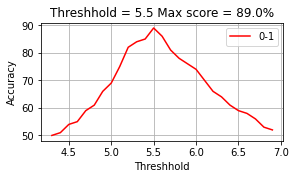

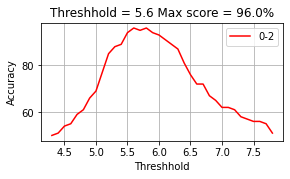

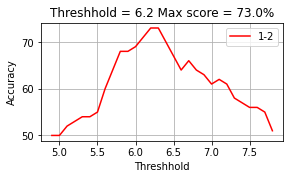

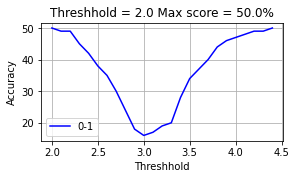

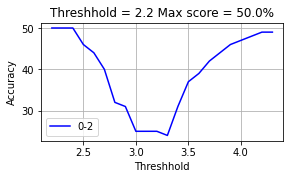

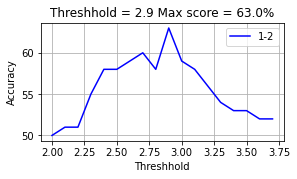

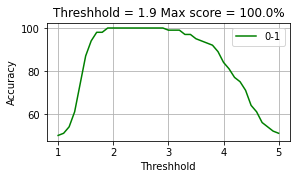

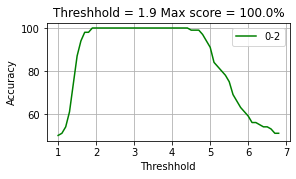

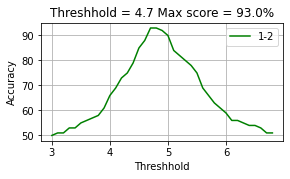

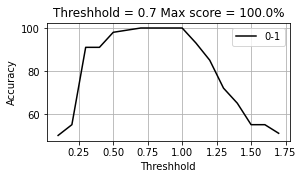

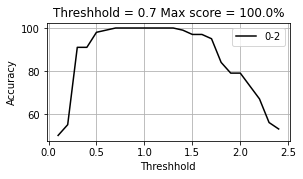

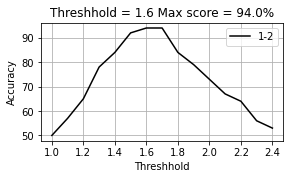

In [ ]:
for i in range(X.shape[0]):
  x = X[i]
  y = Y[i]

  #闘値を変えて実験してみる
  import numpy as np
  x_min = np.min(x)
  x_max = np.max(x)
  params = np.arange(x_min,x_max,0.1)

  #正答率を保存するリスト
  acc = []
  #ループを回す
  for param in params:
    accuracy = acc_cal(x,y,param)
    acc.append(accuracy)

  #スコアの最大値を得る
  idx = np.argmax(acc)
  threshhold = params[idx]
  max_score = acc[idx]

  #redは0番目の特徴量
  #blueは1番目の特徴量
  #greenは2番目の特徴量
  colors = ['red','blue','green','black']
  if i<3:
    color = colors[0]
  elif i>=3 and i<6:
    color = colors[1]
  elif i>=6 and i<9:
    color = colors[2]
  else:
    color = colors[3]

  plt.figure(figsize=(20,10))
  plt.subplot(4,4,i+1)
  plt.plot(params,acc,color=color,label=str(np.unique(y)[0])+"-"+str(np.unique(y)[1]))
  plt.legend(loc="best")
  plt.xlabel("Threshhold")
  plt.ylabel("Accuracy")
  plt.title("Threshhold = "+str(round(threshhold,3))+" Max score = "+str(max_score)+"%")
  plt.grid(True)


**工夫点** \
関数を上手く使ったこと (予測と正答率の計算) \
闘値と正答率の推移を見たいのでfor文を使って、異なる闘値に対応する正答率を計算させる。更に、0番目の特徴量の2値分類(class0 vs class1)を上で行ったが、irisデータの特徴量次元は4つなので、同様の操作を他の特徴量データと他のクラスの分類で行うことができる。授業ではじめ書かれていた処理では闘値がある値以上では0を返し、それ以外では1を返していた。しかし、irisデータは0 1 2 と3class存在するため、class 2が出てきたとき同様の操作ではエラーが起こる。なので、予測に用いる訓練ラベルからpredict関数でのlabelを設定できるようにした。その他、グラフを用いて可視化したりなど挙動を追えるように工夫した。（色分けは特徴量データの種類による）